In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
people = ['p1', 'p2', 'p3', 'p4']
books = ['b1', 'b2', 'b3', 'b4']
interests = [('p1', 'b1'), ('p1', 'b2'), ('p2', 'b2'), ('p2', 'b3'), ('p3', 'b1'), ('p3', 'b4'), ('p4', 'b1'), ('p4', 'b2'), ('p4', 'b4')]

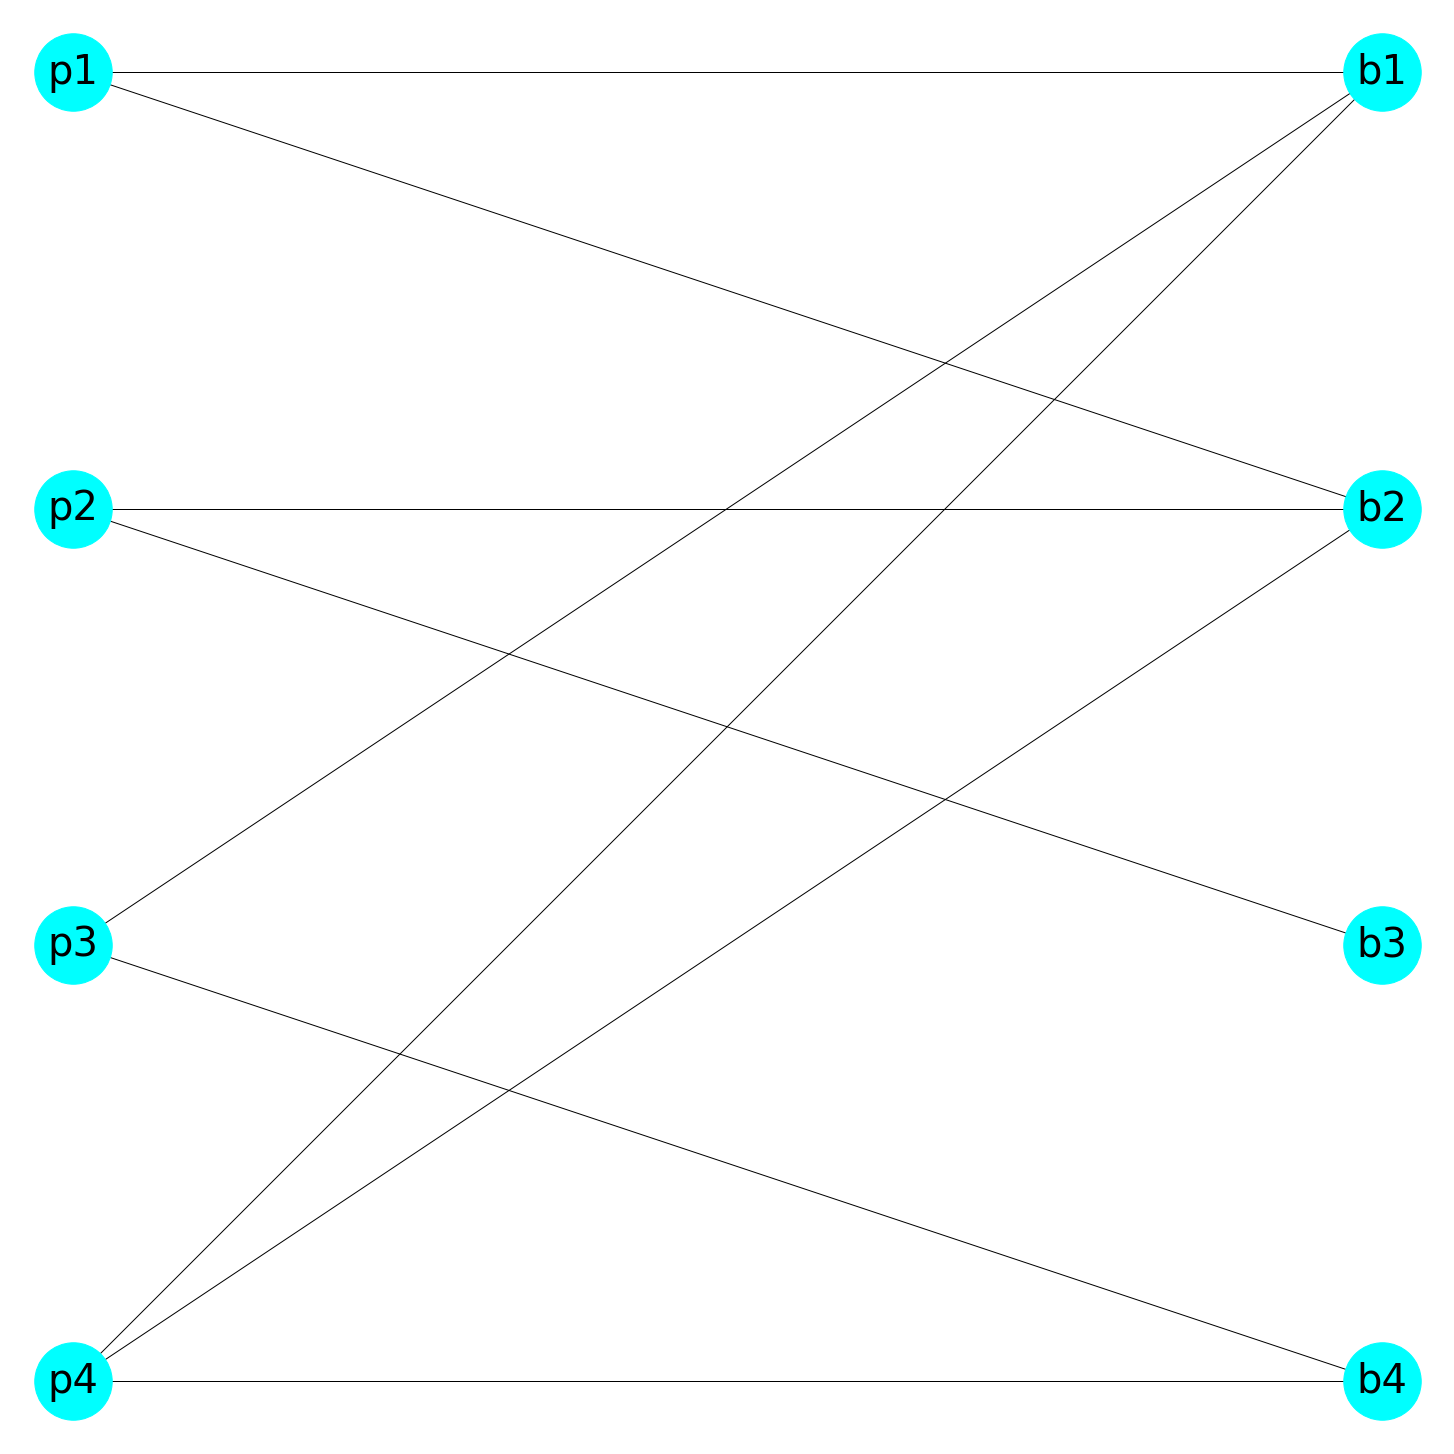

In [3]:
G = nx.Graph()
G.add_edges_from(interests)

pos = {'p1':[0,2], 'p2':[0,1], 'p3':[0,0], 'p4':[0,-1], 'b1':[1,2], 'b2':[1,1], 'b3':[1,0], 'b4':[1,-1]}

plt.figure(figsize=(20, 20))
nx.draw(G, pos, node_color='#00ffff', arrowsize=30, node_size=6000, font_size=40, with_labels=True)

In [4]:
# point a.

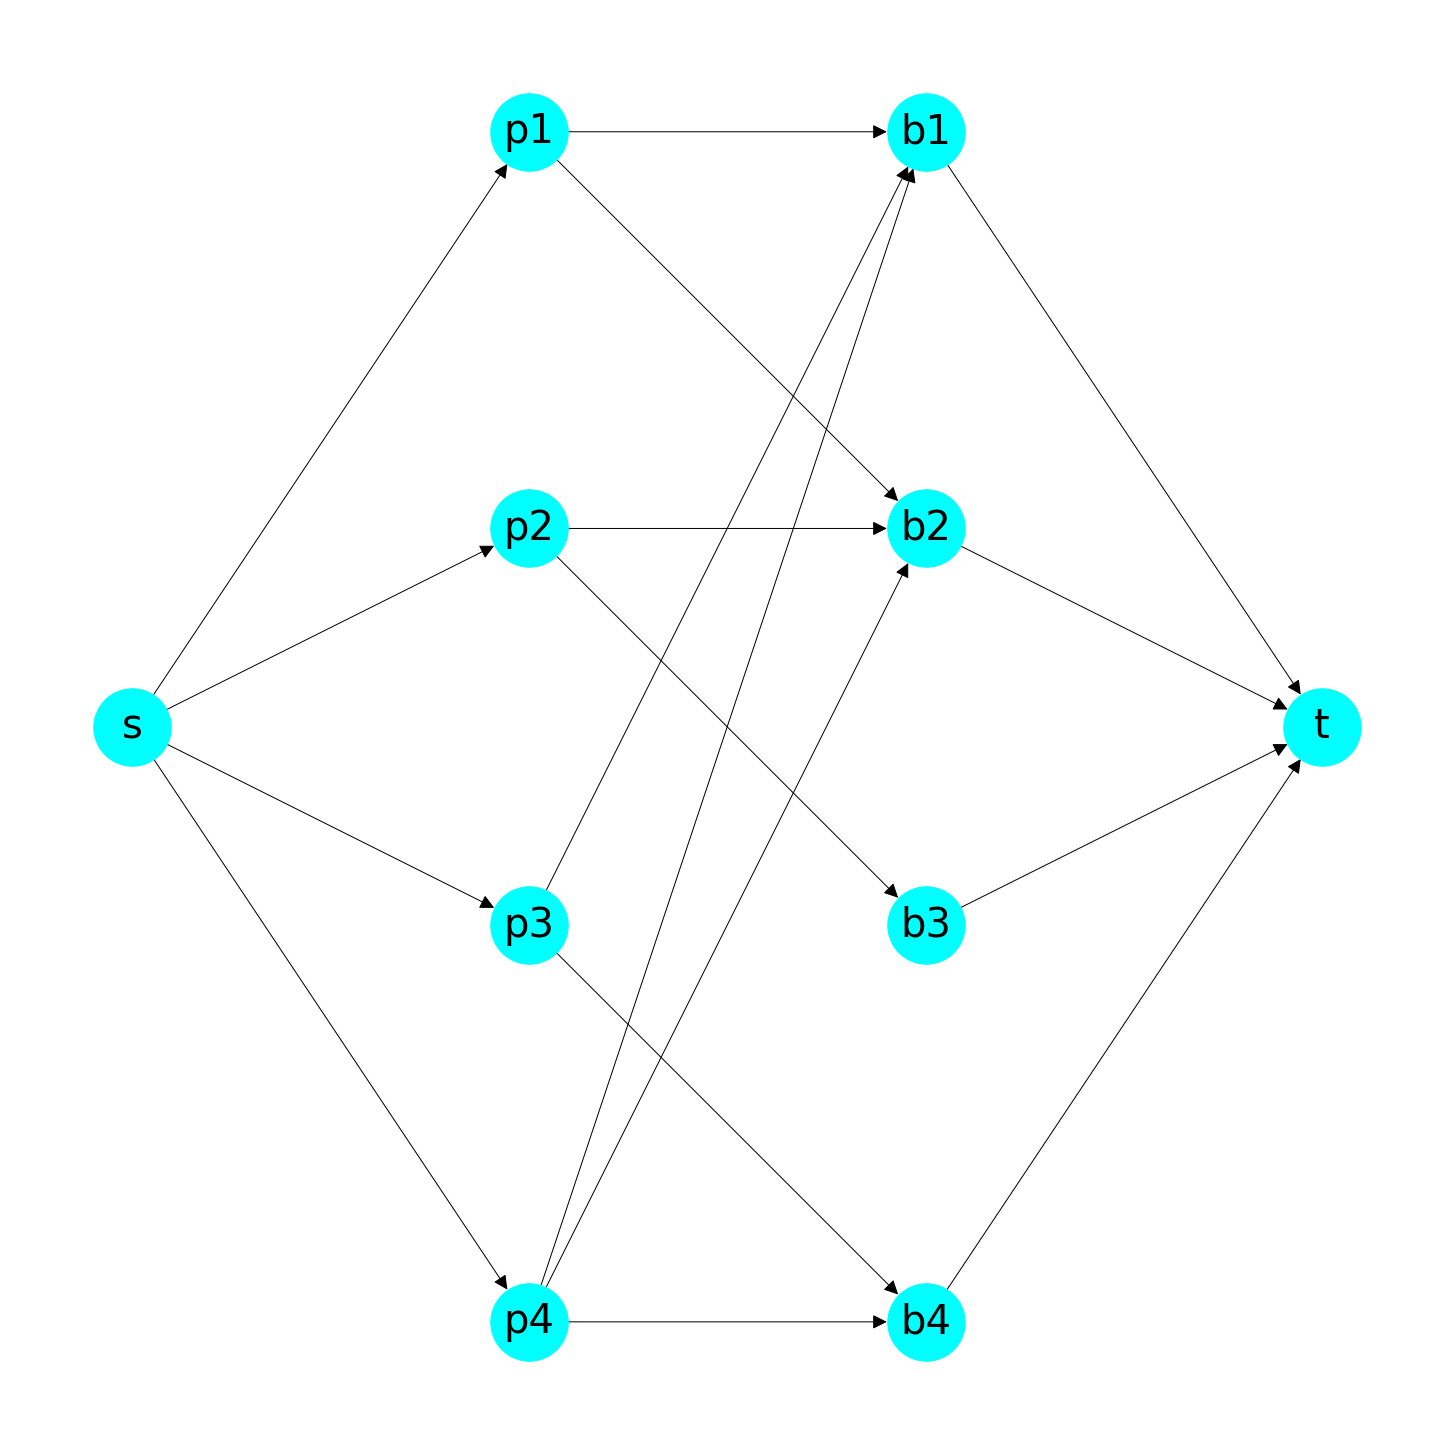

In [5]:
G1 = nx.DiGraph()
#for every undirected edge (i,j) in G, add a directed edge (i,j) in G1
G1.add_edges_from(interests) 
#for every node n in 'people', add an edge (s,n); for every node n in 'books', add an edge (n,t)
additional_edges = []
for node in people:
    additional_edges.append(('s', node))
for node in books:
    additional_edges.append((node, 't'))
G1.add_edges_from(additional_edges)

pos = {'p1':[0,2], 'p2':[0,1], 'p3':[0,0], 'p4':[0,-1], 'b1':[1,2], 'b2':[1,1], 'b3':[1,0], 'b4':[1,-1], 's':[-1,0.5], 't':[2,0.5]}

plt.figure(figsize=(20, 20))
nx.draw(G1, pos, node_color='#00ffff', arrowsize=30, node_size=6000, font_size=40, with_labels=True)

In [6]:
for (i,j) in list(G1.edges):
    G1[i][j]['capacity'] = 1

In [7]:
origin = 's'
destination = 't'

In [8]:
R = nx.algorithms.flow.edmonds_karp(G1,origin,destination)
print("The maximum flow:", R.graph['flow_value'], "\n")

The maximum flow: 4 



Since there exists a flow with throughput $|V_0|$ = 4 on the network $G1$, a $V_0$-perfect matching on $G$ exists. ($V_0$ refers to set 'people' of the original graph $G$.)

In [9]:
for u,v in G.edges():
    G[u][v]['color'] = 'black'

col = ['red', 'green', 'orange', 'blue']
print("Book taken by people.")
for i in people:
    for j in books:
        try:
            v = R[i][j]['flow']
            if v==1:
                G[i][j]['color'] = col.pop()
                print(i, "->", j)
        except KeyError:
            pass

Book taken by people.
p1 -> b1
p2 -> b3
p3 -> b4
p4 -> b2


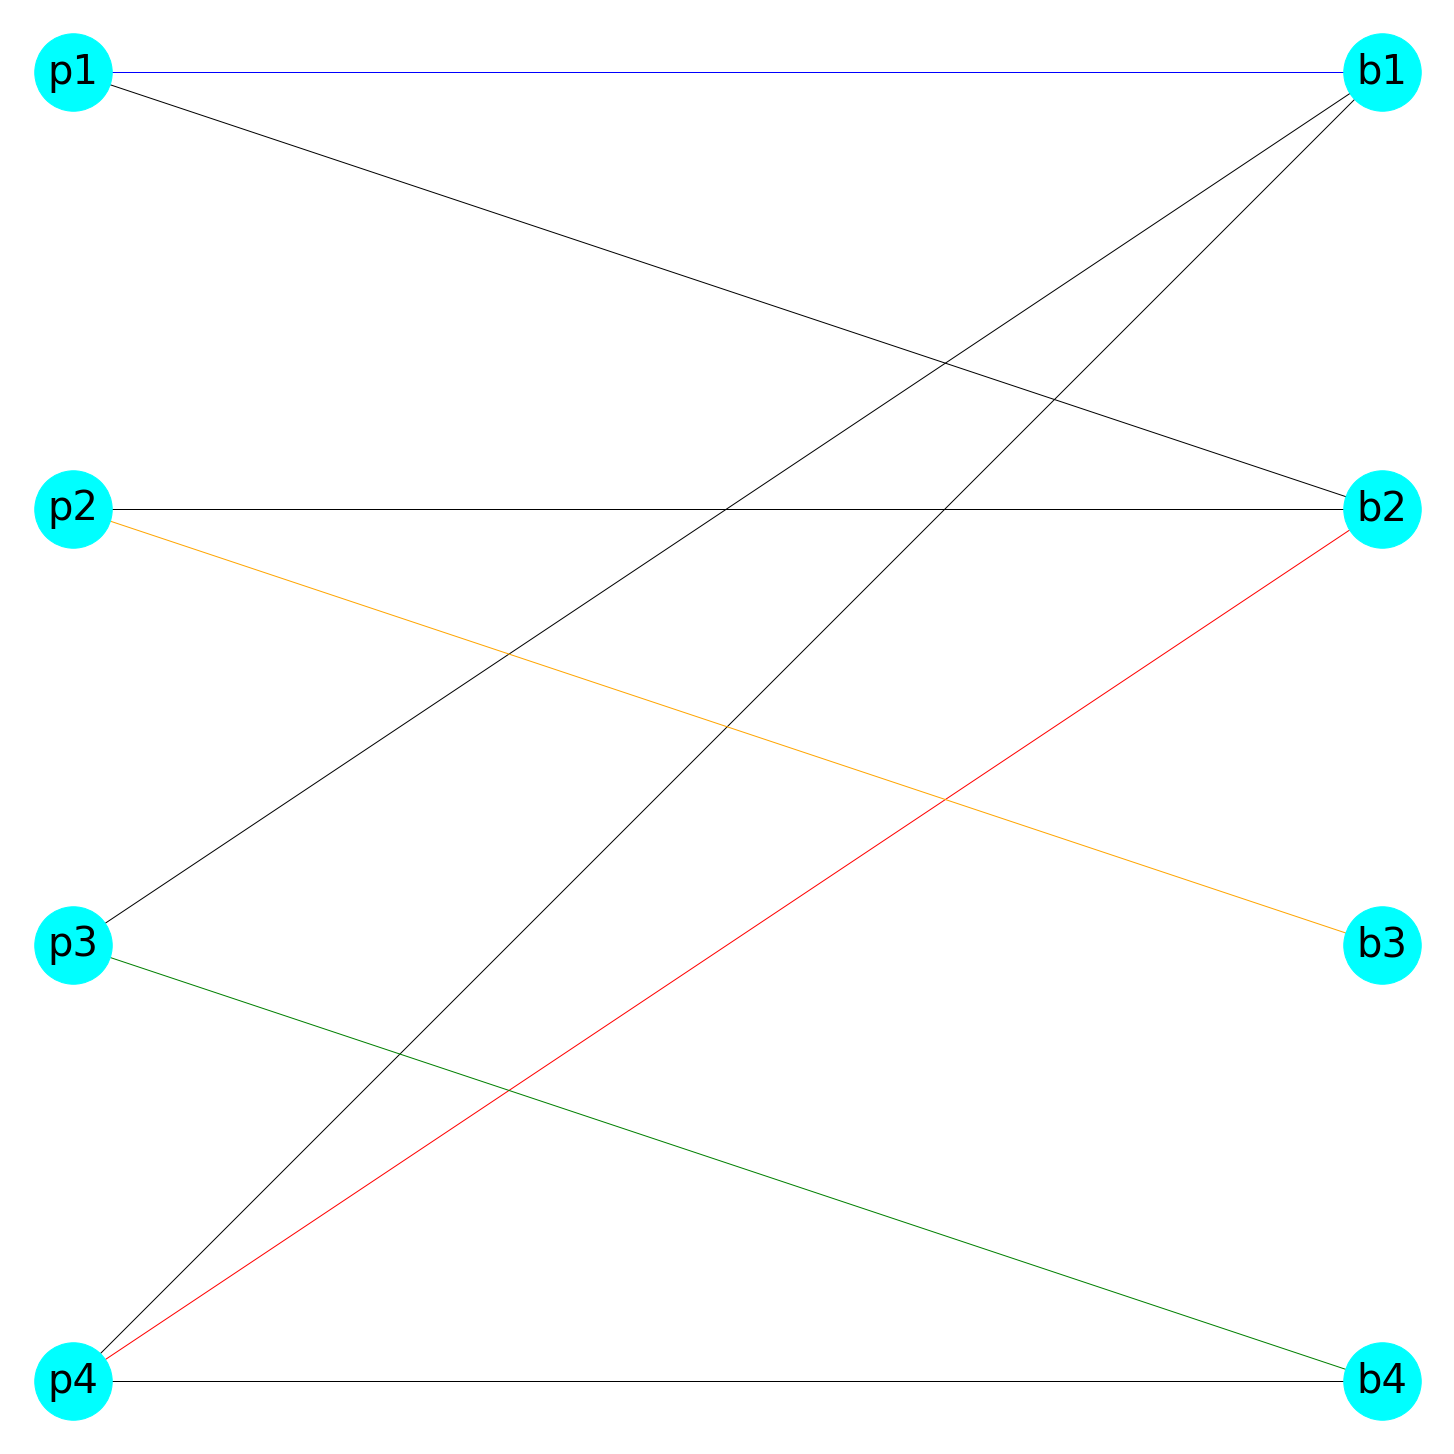

In [10]:
colors = [G[u][v]['color'] for u,v in G.edges()]
plt.figure(figsize=(20, 20))
nx.draw(G, pos, node_color='#00ffff', arrowsize=30, node_size=6000, font_size=40, with_labels = True, edge_color = colors)

Each colored edge (i.e.: with a color different from black) is an element belonging to a $V_0$-perfect matching $M$. ($V_0$ refers to set 'people' of the original graph $G$.)

In [11]:
# point b.

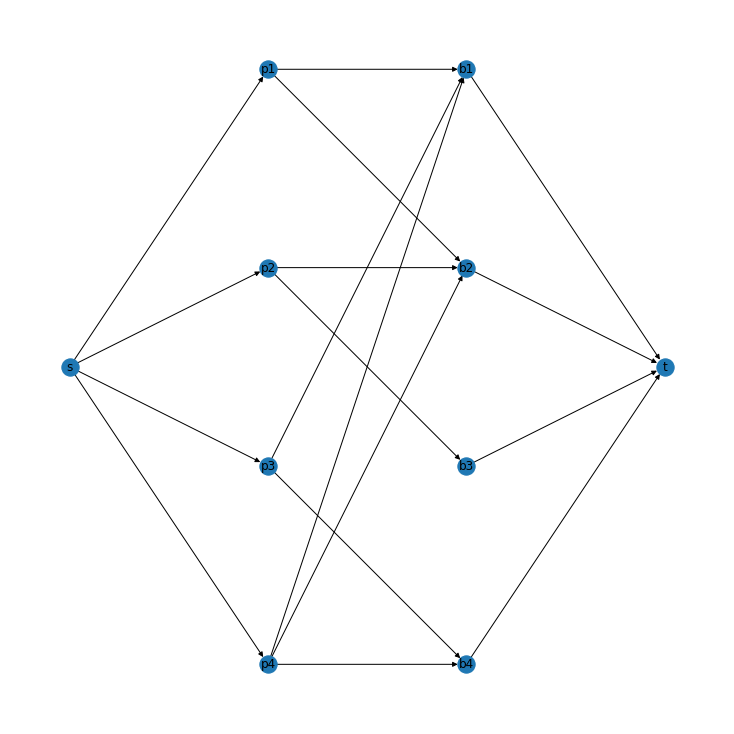

In [12]:
G1 = nx.DiGraph()
#for every undirected edge (i,j) in G, add a directed edge (i,j) in G1
G1.add_edges_from(interests) 
#for every node n in 'people', add an edge (s,n); for every node n in 'books', add an edge (n,t)
additional_edges = []
for node in people:
    additional_edges.append(('s', node))
for node in books:
    additional_edges.append((node, 't'))
G1.add_edges_from(additional_edges)

pos = {'p1':[0,2], 'p2':[0,1], 'p3':[0,0], 'p4':[0,-1], 'b1':[1,2], 'b2':[1,1], 'b3':[1,0], 'b4':[1,-1], 's':[-1,0.5], 't':[2,0.5]}

plt.figure(figsize=(10, 10))
nx.draw(G1,pos,with_labels=True)

In [13]:
for (i,j) in list(G1.edges):
    if i != 's':
        G1[i][j]['capacity'] = 1

G1['b1']['t']['capacity'] = 2
G1['b2']['t']['capacity'] = 3
G1['b3']['t']['capacity'] = 2
G1['b4']['t']['capacity'] = 2

In [14]:
origin = 's'
destination = 't'

In [15]:
R = nx.algorithms.flow.edmonds_karp(G1,origin,destination)
print("The maximum flow:", R.graph['flow_value'], "\n")

The maximum flow: 8 



In [16]:
print("Book taken by people.")
for i in people:
    for j in books:
        try:
            v = R[i][j]['flow']
            G1[i][j]['assignment'] = v
            print(i, "->", j, ":", v)
        except KeyError:
            pass
    
for i in people:
    v = R['s'][i]['flow']
    G1['s'][i]['assignment'] = v
    print("s", "->", i, ":", v, "--- number of different books taken by", i)
for j in books:
    v = R[j]['t']['flow']
    G1[j]['t']['assignment'] = v
    print(j, "->", "t", "->", v, "--- number of copies of book", j, "taken by people")

Book taken by people.
p1 -> b1 : 1
p1 -> b2 : 1
p2 -> b2 : 1
p2 -> b3 : 1
p3 -> b1 : 1
p3 -> b4 : 1
p4 -> b1 : 0
p4 -> b2 : 1
p4 -> b4 : 1
s -> p1 : 2 --- number of different books taken by p1
s -> p2 : 2 --- number of different books taken by p2
s -> p3 : 2 --- number of different books taken by p3
s -> p4 : 2 --- number of different books taken by p4
b1 -> t -> 2 --- number of copies of book b1 taken by people
b2 -> t -> 3 --- number of copies of book b2 taken by people
b3 -> t -> 1 --- number of copies of book b3 taken by people
b4 -> t -> 2 --- number of copies of book b4 taken by people


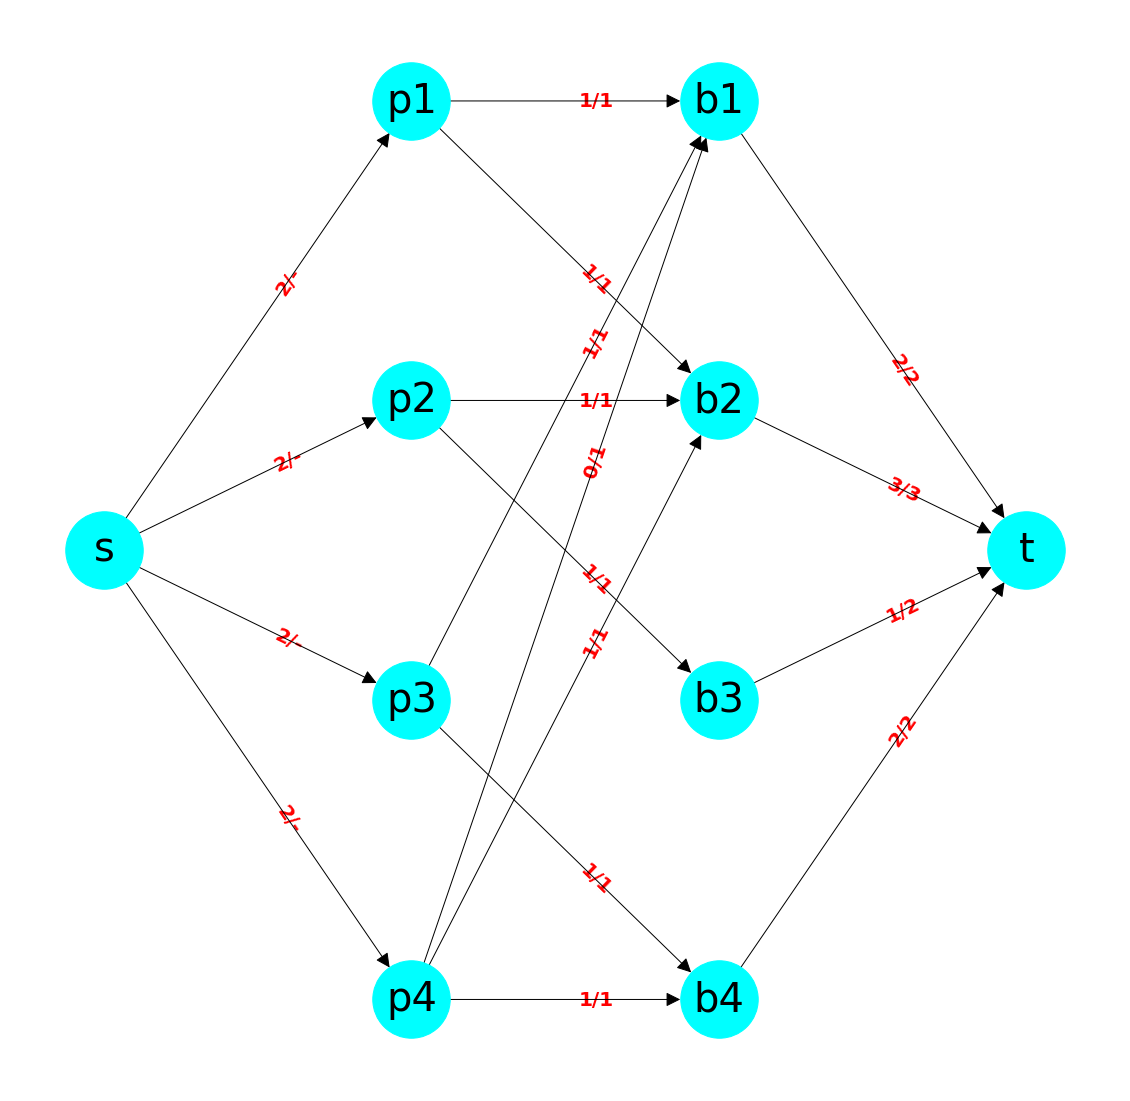

In [17]:
labels = {}
for (i,j) in list(G1.edges):
    edge = (i, j)
    try:
        label = str(G1[i][j]['assignment'])
    except KeyError: # no assignment
        label = "-"
    label += "/"
    try:
        label += str(G1[i][j]['capacity'])
    except KeyError: # no capacity
        label += "-"
    labels[edge] = label
plt.figure(figsize=(20, 20))
nx.draw_networkx_edge_labels(G1, pos, edge_labels= labels, font_color='red', font_size=20, font_weight='bold', label_pos=0.4)
nx.draw(G1, pos, node_color='#00ffff', arrowsize=30, node_size=6000, font_size=40, with_labels=True)

In [18]:
# point c.

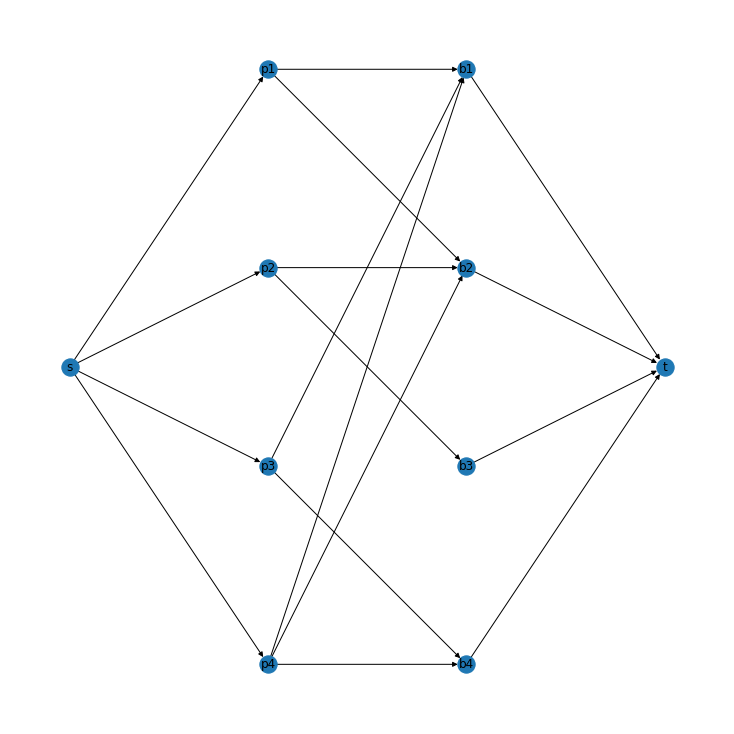

In [19]:
G1 = nx.DiGraph()
#for every undirected edge (i,j) in G, add a directed edge (i,j) in G1
G1.add_edges_from(interests) 
#for every node n in 'people', add an edge (s,n); for every node n in 'books', add an edge (n,t)
additional_edges = []
for node in people:
    additional_edges.append(('s', node))
for node in books:
    additional_edges.append((node, 't'))
G1.add_edges_from(additional_edges)

pos = {'p1':[0,2], 'p2':[0,1], 'p3':[0,0], 'p4':[0,-1], 'b1':[1,2], 'b2':[1,1], 'b3':[1,0], 'b4':[1,-1], 's':[-1,0.5], 't':[2,0.5]}

plt.figure(figsize=(10, 10))
nx.draw(G1,pos,with_labels=True)

In [20]:
for (i,j) in list(G1.edges):
    if i != 's':
        G1[i][j]['capacity'] = 1

G1['b1']['t']['capacity'] = 3 # (before: 2) 1 additional copy of the book is bought
G1['b2']['t']['capacity'] = 3
G1['b3']['t']['capacity'] = 1 # (before: 2) 1 copy of the book is sold
G1['b4']['t']['capacity'] = 2

# The flow on edge (b3, t) can't be greater than 1, since b3 has only 1 edge e=(i, b3) with capacity 1:
# it means that the number of copies of b3 taken can't be greater than 1 since only 1 copy has been requested.
# Since the capacity of (b3, t) is 2, 1 unit of capacity can be removed:
# it means that 1 copy of b3 can be sold by the library since no one has requested it.

# The flow on edge (b1, t) can't be greater than 2, since its capacity is 2:
# it means that the number of copies of b1 taken can't be greater than 2 since there are only 2 copies available.
# b1 has 3 edges e=(i, b1) with capacity 1 and only 2 of them will have flow equals 1 (ony 2 people can take a copy of b1).
# The capacity of (b1, t) can be increased by 1 unit:
# it means that 1 copy of b1 can be bought by the library since there are 3 people requesting a copy but only 2 copy available.

# -> the capacity of edge (b3, t) is decreased by 2, the capacity of edge (b1, t) is increased by 1: a copy of b3 is sold and a copy of b1 is bought.

In [21]:
origin = 's'
destination = 't'

In [22]:
R = nx.algorithms.flow.edmonds_karp(G1,origin,destination)
print("The maximum flow:", R.graph['flow_value'], "\n")

The maximum flow: 9 



In [23]:
print("Book taken by people.")
for i in people:
    for j in books:
        try:
            v = R[i][j]['flow']
            G1[i][j]['assignment'] = v
            print(i, "->", j, ":", v)
        except KeyError:
            pass
    
for i in people:
    v = R['s'][i]['flow']
    G1['s'][i]['assignment'] = v
    print("s", "->", i, ":", v, "--- number of different books taken by", i)
for j in books:
    v = R[j]['t']['flow']
    G1[j]['t']['assignment'] = v
    print(j, "->", "t", "->", v, "--- number of copies of book", j, "taken by people")

Book taken by people.
p1 -> b1 : 1
p1 -> b2 : 1
p2 -> b2 : 1
p2 -> b3 : 1
p3 -> b1 : 1
p3 -> b4 : 1
p4 -> b1 : 1
p4 -> b2 : 1
p4 -> b4 : 1
s -> p1 : 2 --- number of different books taken by p1
s -> p2 : 2 --- number of different books taken by p2
s -> p3 : 2 --- number of different books taken by p3
s -> p4 : 3 --- number of different books taken by p4
b1 -> t -> 3 --- number of copies of book b1 taken by people
b2 -> t -> 3 --- number of copies of book b2 taken by people
b3 -> t -> 1 --- number of copies of book b3 taken by people
b4 -> t -> 2 --- number of copies of book b4 taken by people


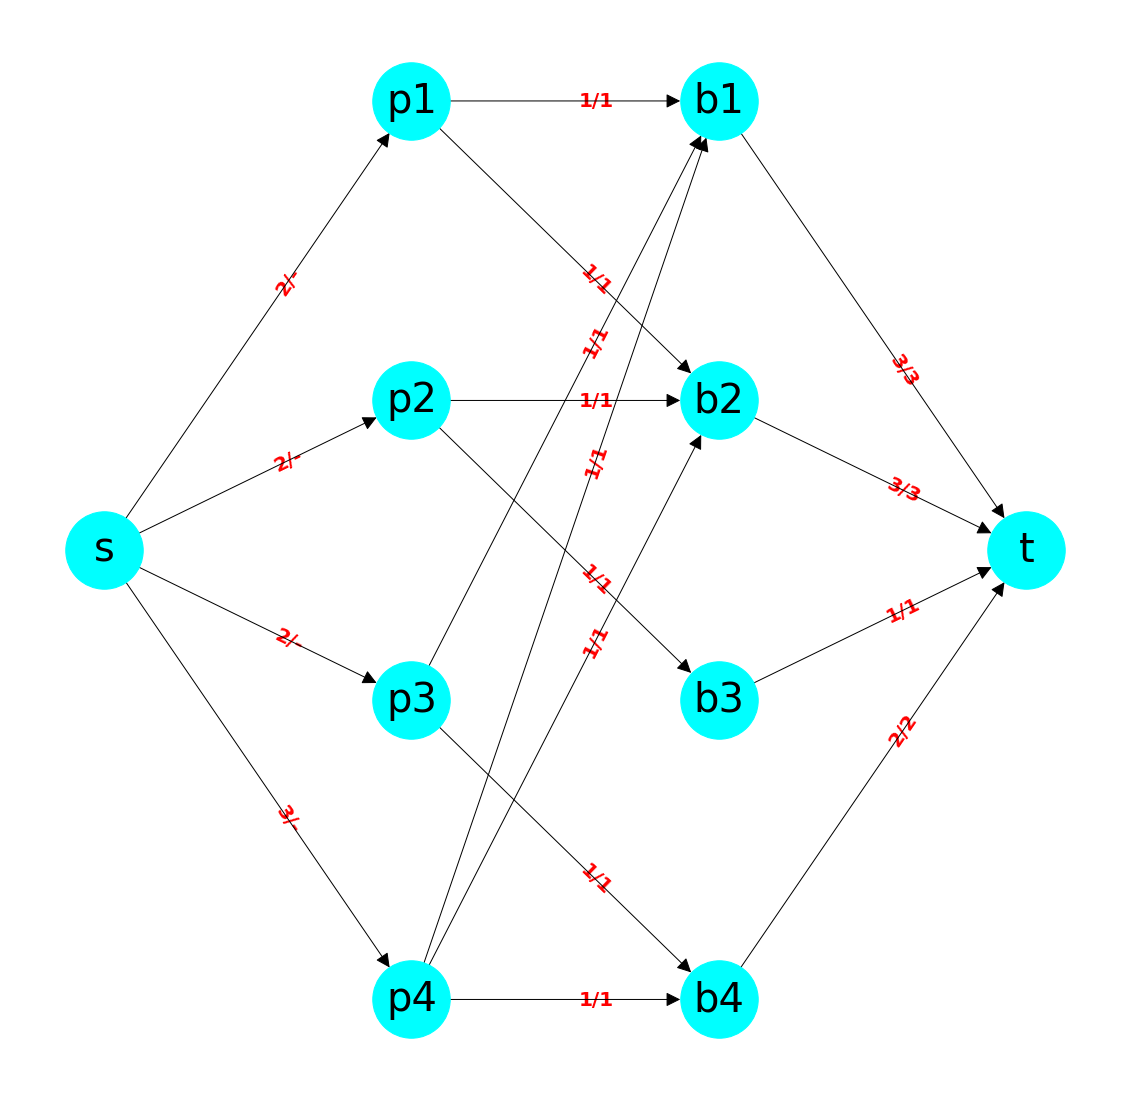

In [24]:
labels = {}
for (i,j) in list(G1.edges):
    edge = (i, j)
    try:
        label = str(G1[i][j]['assignment'])
    except KeyError:
        label = "-"
    label += "/"
    try:
        label += str(G1[i][j]['capacity'])
    except KeyError:
        label += "-"
    labels[edge] = label
plt.figure(figsize=(20, 20))
nx.draw_networkx_edge_labels(G1, pos, edge_labels= labels, font_color='red', font_size=20, font_weight='bold', label_pos=0.4)
nx.draw(G1, pos, node_color='#00ffff', arrowsize=30, node_size=6000, font_size=40, with_labels=True)